# Data Analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
data = pd.read_csv("games_data.csv", index_col="datetime")

In [13]:
data.head()

,game type,champion played,team,position,win,alied1,alied2,alied3,alied4,enemy1,enemy2,enemy3,enemy4,enemy5
datetime,,,,,,,,,,,,,,
2023-12-20 18:47:54,CLASSIC,Elise,blue,JUNGLE,True,Yone,Zoe,Jhin,Renata,Nasus,LeeSin,Lissandra,Aphelios,Janna
2023-12-19 21:05:00,CLASSIC,Elise,blue,JUNGLE,True,Gnar,Ahri,Kaisa,Lux,Trundle,Volibear,Galio,Jhin,Milio
2023-12-19 20:27:28,CLASSIC,Elise,blue,JUNGLE,True,KSante,Xerath,Ashe,Thresh,Darius,Diana,Jayce,Caitlyn,Lux
2023-12-19 19:23:04,CLASSIC,Elise,red,JUNGLE,False,Yasuo,Zed,Kaisa,Lux,Ashe,Amumu,Ekko,Ezreal,Janna
2023-12-19 17:55:44,CLASSIC,Elise,blue,JUNGLE,False,Fiora,Anivia,Samira,Leona,Vladimir,Nocturne,Syndra,Jinx,Lulu


# Variable Distributions

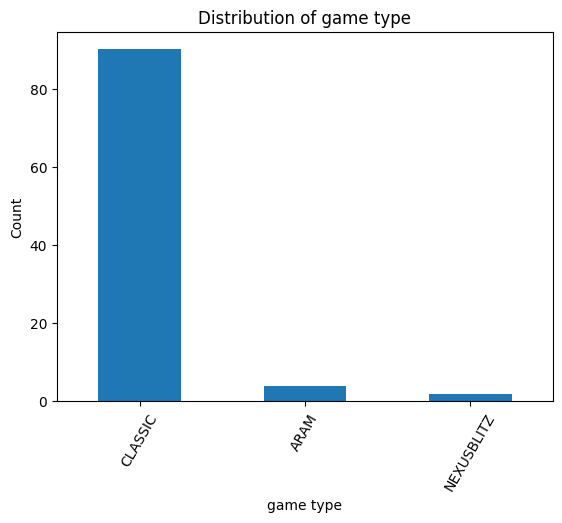

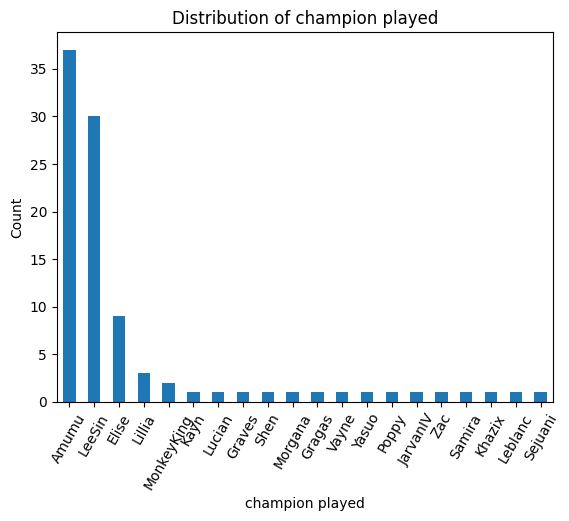

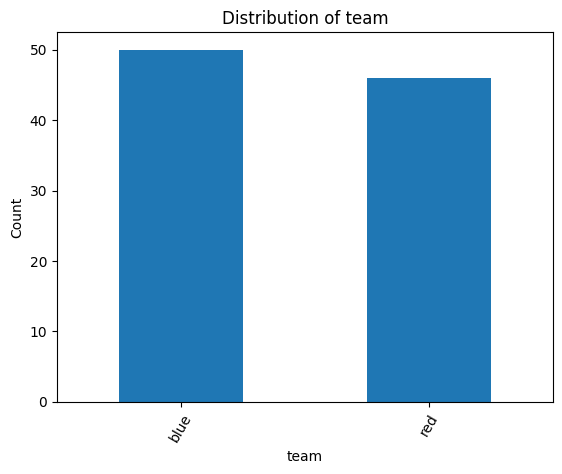

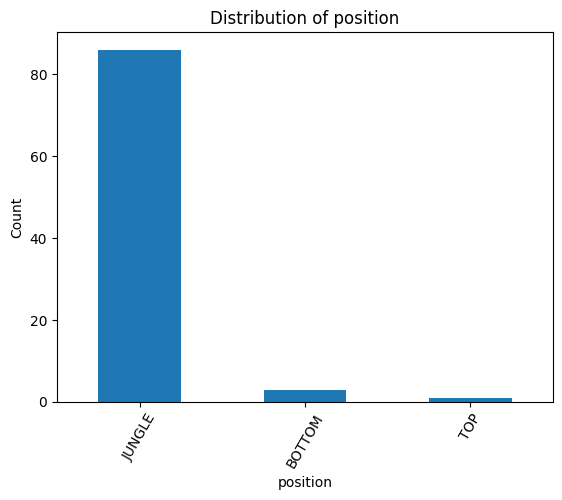

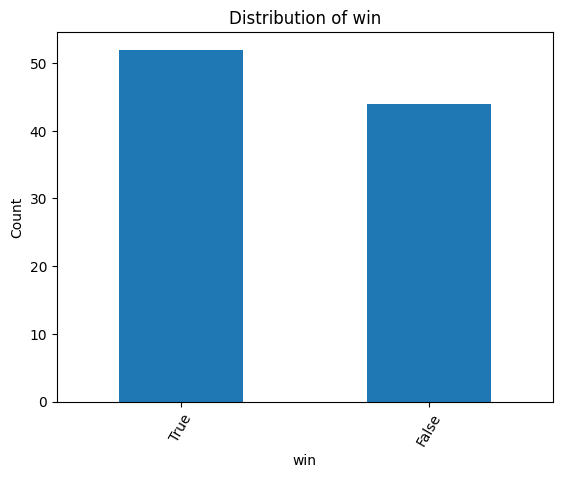

In [14]:
for col in ["game type", "champion played", "team", "position", "win"]:
    value_counts_result = data[col].value_counts()

    # Visualize the counts using a bar plot
    value_counts_result.plot(kind='bar', rot=60)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.show()

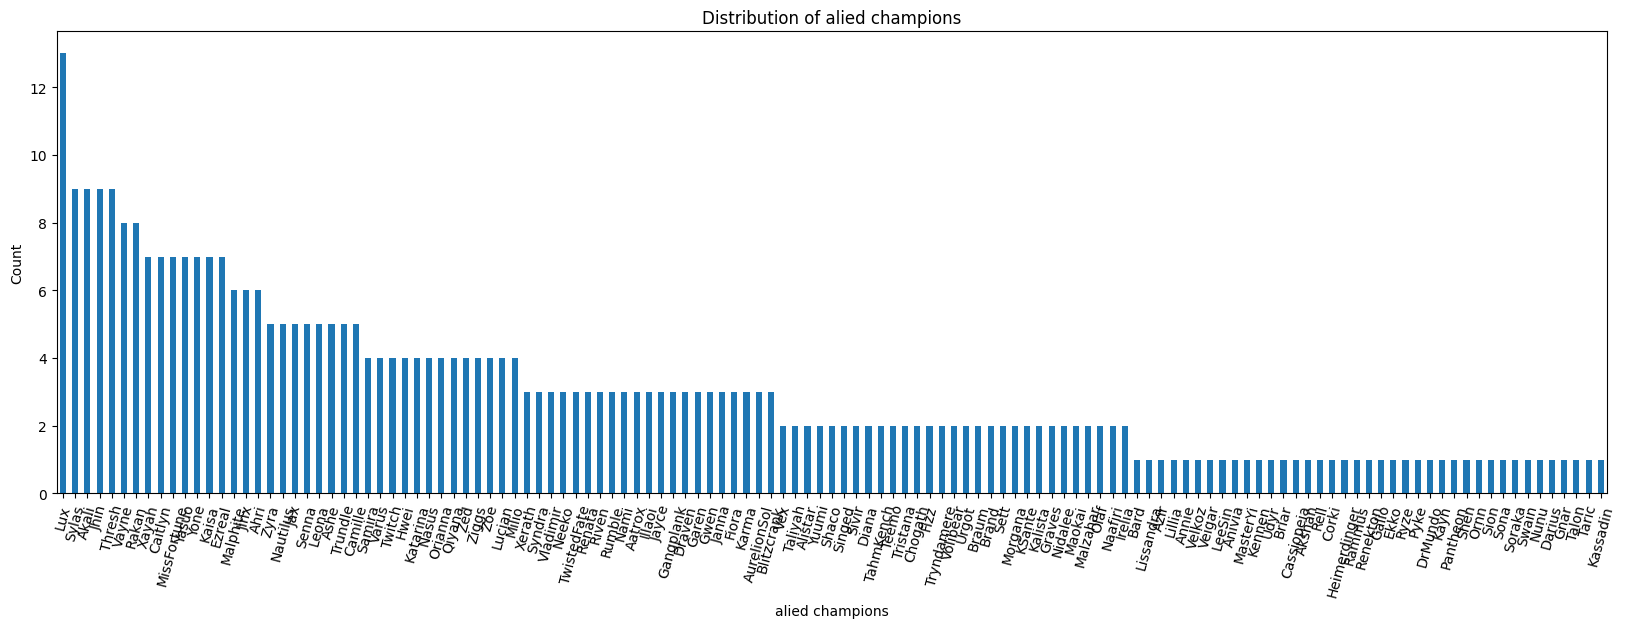

In [15]:
alied_champs = pd.Series()

columns_to_sum = ["alied1",'alied2', "alied3", "alied4"]

for column in columns_to_sum:
    new_alied = data[column].value_counts()
    alied_champs = alied_champs.add(new_alied, fill_value=0)


alied_champs = alied_champs.sort_values(ascending=False)


# Visualize the counts using a bar plot
plt.figure(figsize=(20, 6))
alied_champs.plot(kind='bar', rot=75)
plt.xlabel("alied champions")
plt.ylabel('Count')
plt.title(f'Distribution of alied champions')
plt.show()

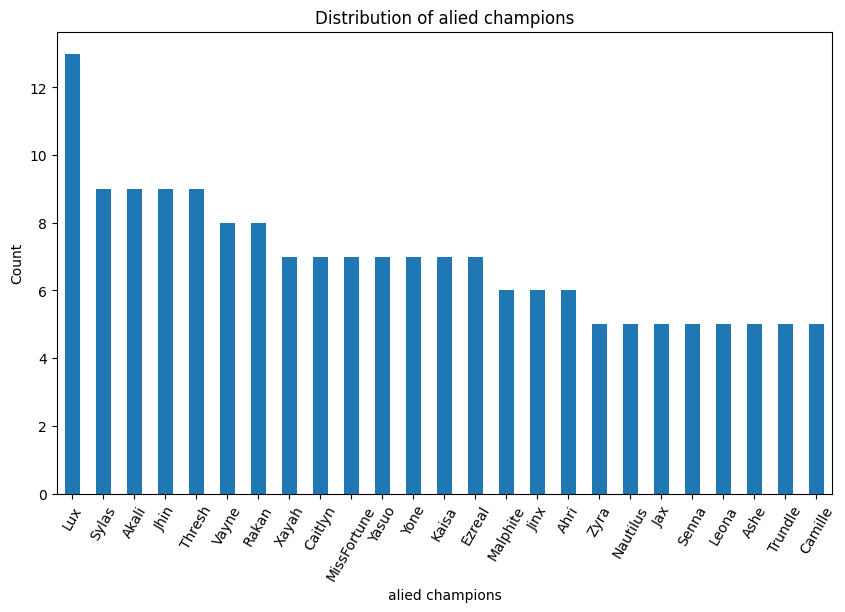

In [16]:
alied_champs = alied_champs[alied_champs > 4]


# Visualize the counts using a bar plot
plt.figure(figsize=(10, 6))
alied_champs.plot(kind='bar', rot=60)
plt.xlabel("alied champions")
plt.ylabel('Count')
plt.title(f'Distribution of alied champions')
plt.show()

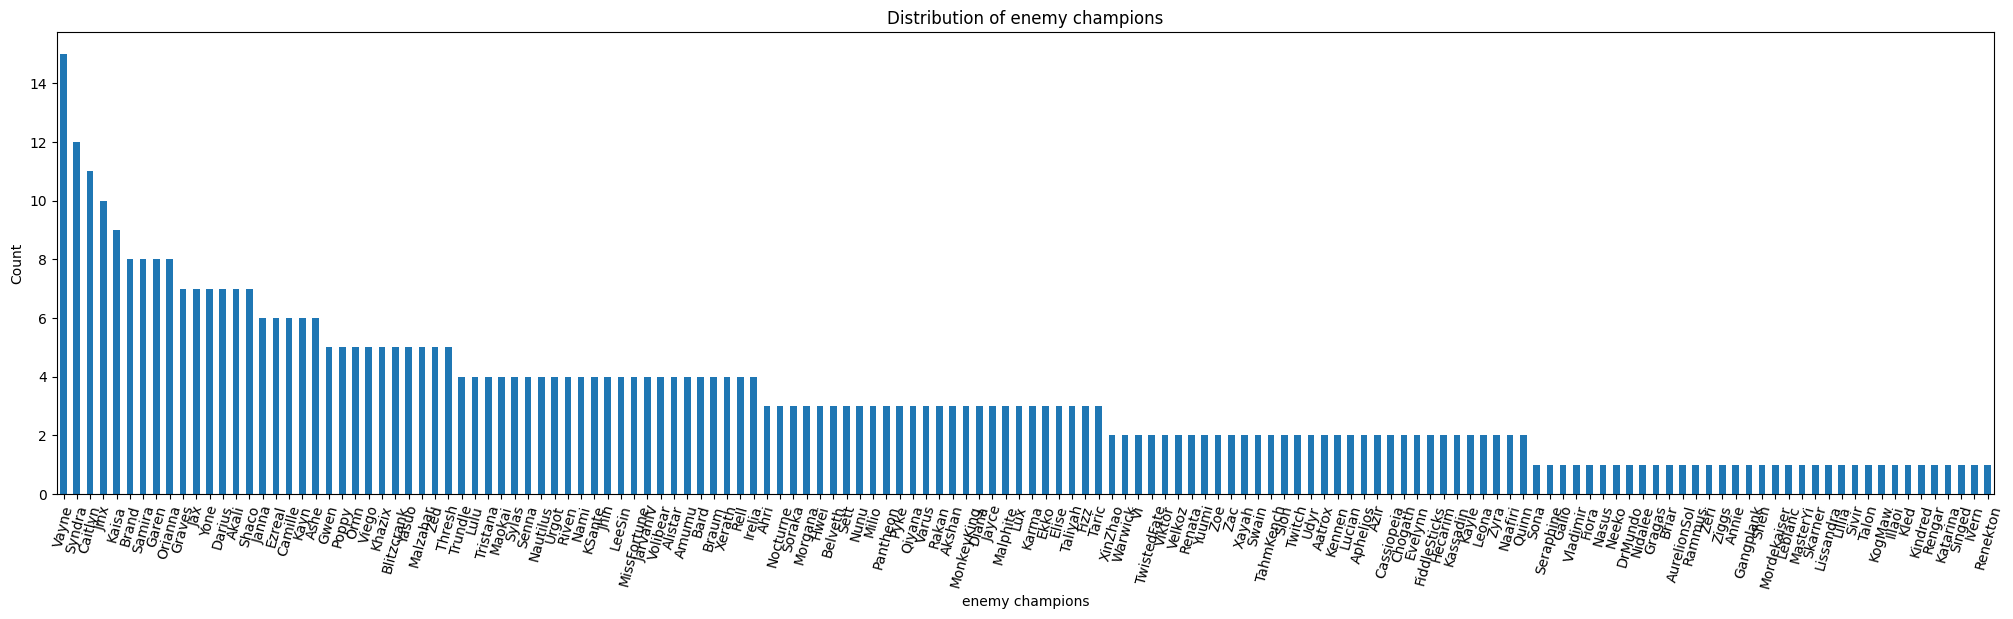

In [17]:
enemy_champs = pd.Series()

columns_to_sum = ["enemy1",'enemy2', "enemy3", "enemy4", "enemy5"]

for column in columns_to_sum:
    new_enemies = data[column].value_counts()
    enemy_champs = enemy_champs.add(new_enemies, fill_value=0)


enemy_champs = enemy_champs.sort_values(ascending=False)


# Visualize the counts using a bar plot
plt.figure(figsize=(25, 6))
enemy_champs.plot(kind='bar', rot=75)
plt.xlabel("enemy champions")
plt.ylabel('Count')
plt.title(f'Distribution of enemy champions')
plt.show()

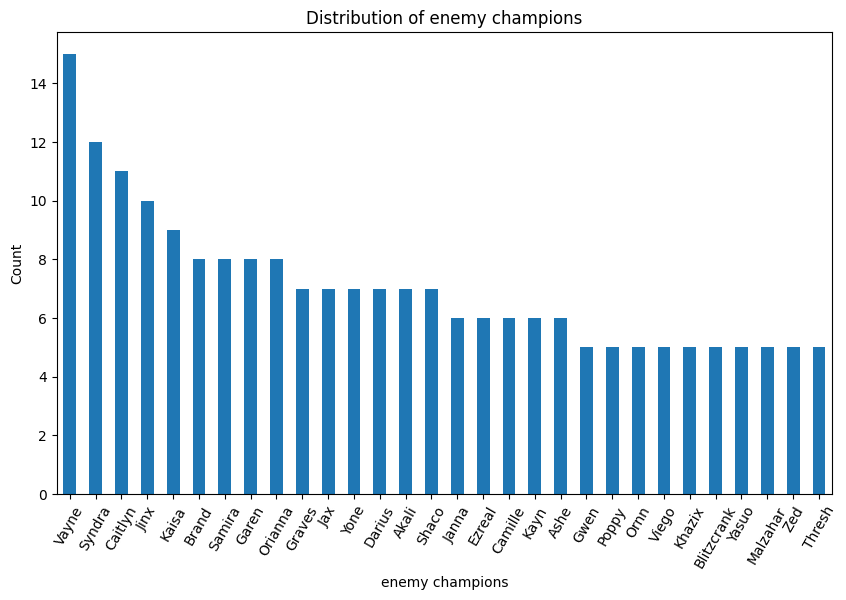

In [18]:
enemy_champs = enemy_champs[enemy_champs > 4]


# Visualize the counts using a bar plot
plt.figure(figsize=(10, 6))
enemy_champs.plot(kind='bar', rot=60)
plt.xlabel("enemy champions")
plt.ylabel('Count')
plt.title(f'Distribution of enemy champions')
plt.show()

# Win rates

In [33]:
win_ratio = round((data['win'].value_counts()[True] / data['win'].value_counts().sum()), 3) * 100
print("Global win rate =", win_ratio, "%")

Global win rate = 54.2 %


In [39]:
classic_data = data[data['game type'] == 'CLASSIC']
win_ratio_classic = round((classic_data['win'].value_counts()[True] / classic_data['win'].value_counts().sum()), 3) * 100
print("Classic win rate=", win_ratio_classic, "%")

Classic win rate= 52.2 %


In [37]:
aram_data = data[data['game type'] == 'ARAM']
win_ratio_aram = round((aram_data['win'].value_counts()[True] / aram_data['win'].value_counts().sum()), 3) * 100
print("ARAM win rate=", win_ratio_aram, "%")

ARAM win rate= 75.0 %


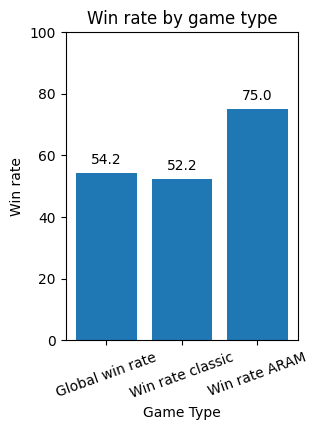

In [57]:
plt.figure(figsize=(3,4))

plt.bar(["Global win rate",'Win rate classic', 'Win rate ARAM'], [win_ratio, win_ratio_classic, win_ratio_aram])

# Add labels and title
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.xlabel('Game Type')
plt.ylabel('Win rate')
plt.title('Win rate by game type')

# Add the values
for i, value in enumerate([win_ratio, win_ratio_classic, win_ratio_aram]):
    plt.text(i, value + 2, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

# Win rates by champion in Summoners Rift

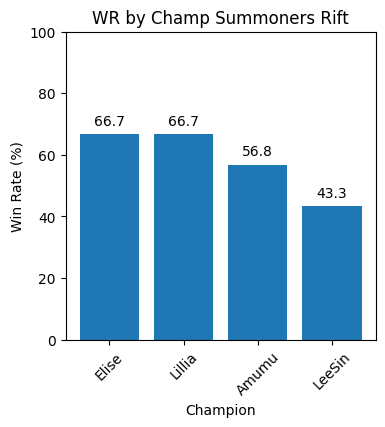

In [88]:
# Calculate win rate by champion
played_champions = classic_data['champion played'].value_counts() > 2
filtered_data = classic_data[classic_data['champion played'].isin(played_champions[played_champions].index)]
win_rate_by_champion = round(filtered_data.groupby('champion played')['win'].mean(),3) * 100  # Multiply by 100 to get percentage

win_rate_by_champion = win_rate_by_champion.sort_values(ascending=False)

if len(win_rate_by_champion.index) > 0:
    # Plot the win rate
    plt.figure(figsize=(len(win_rate_by_champion.index),4))
    plt.ylim(0, 100)
    plt.bar(win_rate_by_champion.index, win_rate_by_champion)
    plt.xlabel('Champion')
    plt.ylabel('Win Rate (%)')
    plt.title('WR by Champ Summoners Rift')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    for i, value in enumerate(win_rate_by_champion):
        plt.text(i, value + 2, str(value), ha='center', va='bottom')

    # Show the plot
    plt.show()
else:
    print("not enough games")

# Win rates by champion in ARAM

In [89]:
# Calculate win rate by champion
played_champions = aram_data['champion played'].value_counts() >= 2
filtered_data = aram_data[aram_data['champion played'].isin(played_champions[played_champions].index)]
win_rate_by_champion = round(filtered_data.groupby('champion played')['win'].mean(),3) * 100  # Multiply by 100 to get percentage

win_rate_by_champion = win_rate_by_champion.sort_values(ascending=False)

# Plot the win rate
if len(win_rate_by_champion.index) > 0:
    plt.figure(figsize=(len(win_rate_by_champion.index),4))
    plt.ylim(0, 110)
    plt.bar(win_rate_by_champion.index, win_rate_by_champion)
    plt.xlabel('Champion')
    plt.ylabel('Win Rate (%)')
    plt.title('WR by Champ ARAM')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    for i, value in enumerate(win_rate_by_champion):
        plt.text(i, value+2, str(value), ha='center', va='bottom')

    # Show the plot
    plt.show()
else:
    print("not enough games")

not enough games


# to be continued